In [30]:
# This data contains several parameters that could determine the chances of a student getting addmitted for masters program in a US university.
# We need to analyse the data to predict the most important parameters a student should focus on
# First of all we will be importing our libraries for analysing our data
import numpy as np #For our numerical computations
import pandas as pd #For data manipulation
import seaborn as sns # For visualization
import matplotlib.pyplot as plt # For visualization
%matplotlib inline 

In [31]:
df=pd.read_csv("Admissions.csv") #Reading our data set
df.describe() 


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [32]:
df.dropna(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


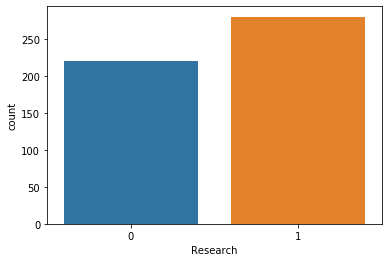

In [34]:
# Visualizations

sns.countplot(df['Research'])

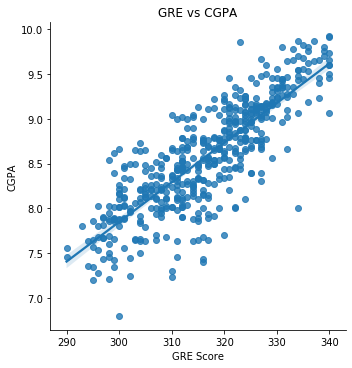

In [35]:
#Does a high Undergraduate CGPA translate to a high GRE score

fig=sns.lmplot(x='GRE Score', y='CGPA', data=df)
plt.title('GRE vs CGPA')
plt.show()

# From the data plotted a strong CGPA translates to a high GRE score

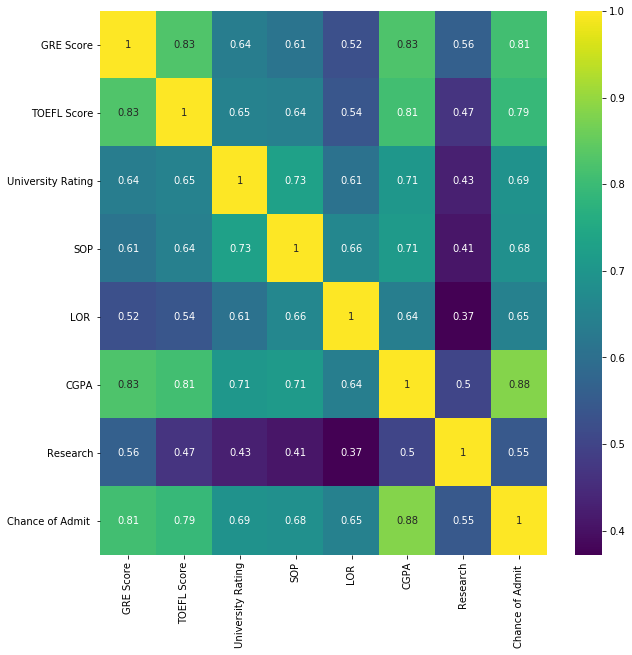

In [36]:
#Visualising the correlation for each of these paramenters
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

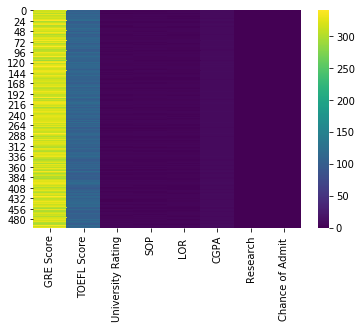

In [37]:
sns.heatmap(df, cbar= True,cmap="viridis")


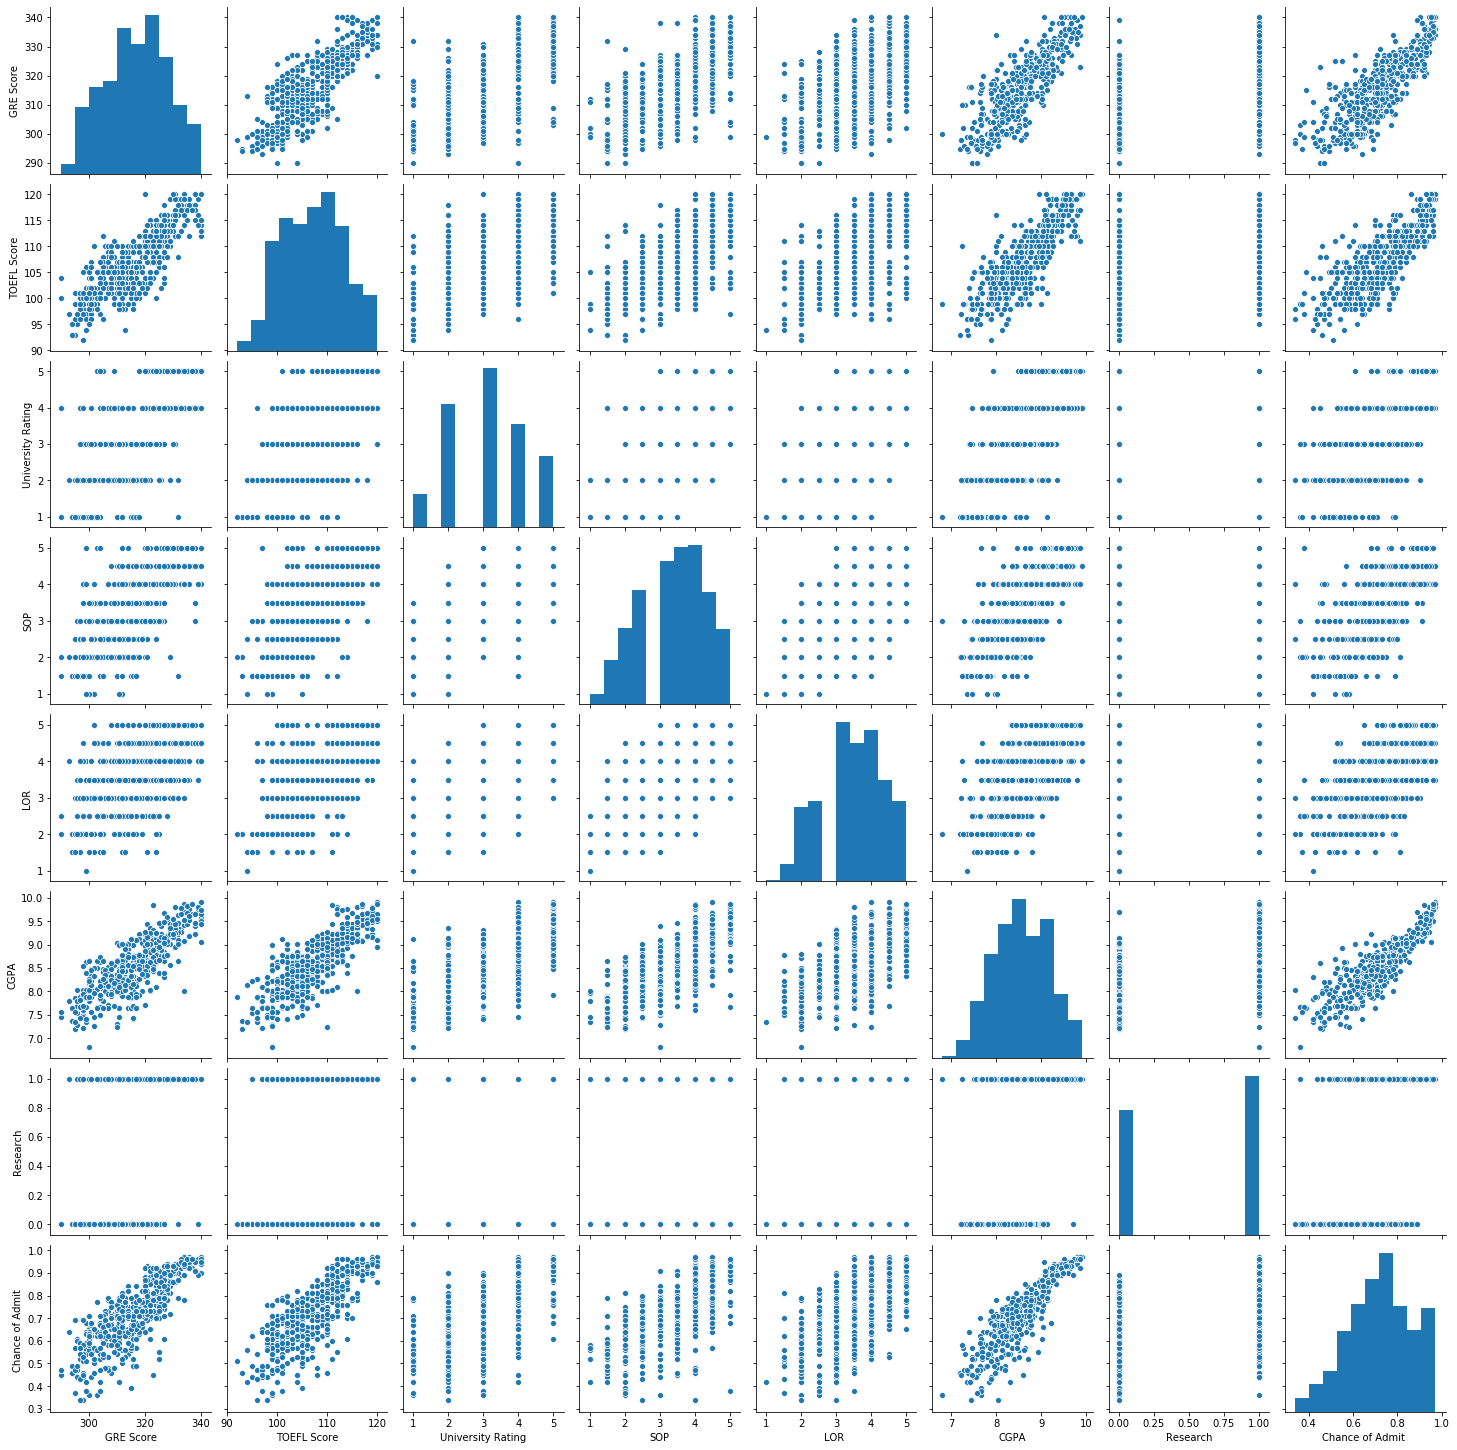

In [38]:
sns.pairplot(df)

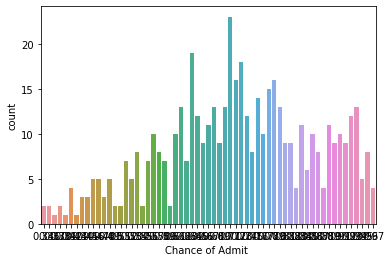

In [39]:
sns.countplot(df["Chance of Admit "])

In [40]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [41]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [42]:
X= df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y= df[['Chance of Admit ']]

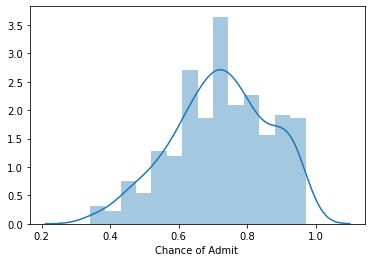

In [43]:
sns.distplot(df["Chance of Admit "], kde=True)

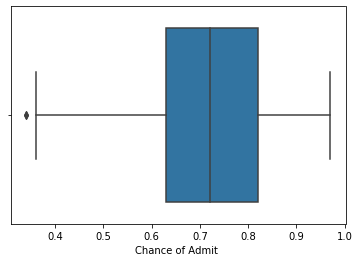

In [44]:
sns.boxplot(x= df["Chance of Admit "])

In [45]:
# Test and train data split
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [47]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
202,340,120,5,4.5,4.5,9.91,1
428,316,103,2,2.0,4.5,8.74,0
392,326,112,4,4.0,3.5,9.12,1
86,315,106,3,4.5,3.5,8.42,0
443,321,114,5,4.5,4.5,9.16,1


In [48]:
X_train.shape

(350, 7)

In [49]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
18,318,110,3,4.0,3.0,8.80,0
361,334,116,4,4.0,3.5,9.54,1
104,326,112,3,3.5,3.0,9.05,1
4,314,103,2,2.0,3.0,8.21,0
156,315,105,3,2.0,2.5,8.34,0


In [50]:
X_test.shape

(150, 7)

In [51]:
from sklearn.linear_model import LinearRegression as lm
model = lm().fit(X_train, y_train)



In [52]:
predictions=model.predict(X_test)


In [53]:
#import matplotlib.pyplot as plt
#plt.scatter(y_test, predictions)

In [54]:
model.intercept_

array([-1.25812943])

In [55]:
#model.coef_
coef= pd.DataFrame(model.coef_,columns=X.columns)

In [56]:
coef

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.001665,0.003093,0.006736,0.004879,0.015472,0.118516,0.021545


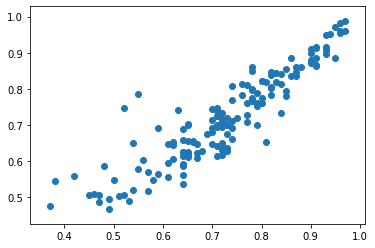

In [57]:
plt.scatter(y_test,predictions)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
MAE= mean_absolute_error(y_test, predictions)
MSE= mean_squared_error(y_test, predictions)
RMSE= np.sqrt(MSE)

In [60]:
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)

MAE: 0.040859662891438456
MSE: 0.003213103614403529
RMSE: 0.05668424485166517
